# III Deep Neural Network Model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import library
import os
import numpy as np
import pandas as pd
import time

# Ploting library
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from keras.layers import BatchNormalization
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import json

import timeit
import statsmodels.api as sm
import datetime as dt
from dateutil.relativedelta import *

In [4]:
# Opening JSON file
file_name = '/content/drive/MyDrive/Colab Notebooks/Dataset/'
with open(file_name+'char_dic.json') as json_file:
    char_dic = json.load(json_file)
    # Print the type of data variable
    print("Type:", type(char_dic))

char_dic.keys()

Type: <class 'dict'>


dict_keys(['firm_variable', 'core_firm', 'macro_variable', 'core_variable', 'label'])

## 3.1 Import data

In [ ]:
#file_name = '/content/drive/MyDrive/Colab Notebooks/Dataset/'
#data = pd.read_pickle(file_name+'4_firm_norm_with_predicted_return.pkl')
#data.insert(1, 'date',pd.to_datetime(data['jdate']).dt.to_period('Y') )
#del(data['jdate'])

#sample2000 = data[data['year'] >  1999]
#sample2000.to_pickle(file_name+'sample200.pkl')

In [ ]:
file_name = '/content/drive/MyDrive/Colab Notebooks/Dataset/'
sample = pd.read_pickle(file_name+'sample200.pkl')

In [ ]:
char_dic['firm_variable'].append('date')

In [ ]:
X = sample[char_dic['firm_variable']] # 2265038 rows × 104 columns 'yyyymm'
Y = sample[['predicted_return','date']] #2265038 rows × 2 columns 'yyyymm'

## 3.2 Define Neural Network Model

In [ ]:
def NN1(n_inputs, dropout=0, learning_rate=0.001, l1_reg=0.001, activation='relu', L = 1):
    model = Sequential()
    model.add(Dense(units=32, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def NN2(n_inputs, dropout=0, learning_rate=0.001, l1_reg=0.001, activation='relu', L = 2):
    model = Sequential()
    model.add(Dense(units=32, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=16, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def NN3(n_inputs, dropout=0, learning_rate=0.001, l1_reg=0.001, activation='relu', L = 3):
    model = Sequential()
    model.add(Dense(units=32, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=16, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=8, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def NN4(n_inputs, dropout=0, learning_rate=0.001, l1_reg=0.001, activation='relu', L = 4):
    model = Sequential()
    model.add(Dense(units=32, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=16, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=8, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=4, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(units=1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [ ]:
def NN5(n_inputs, dropout=0, learning_rate=0.001, l1_reg=0.001, activation='relu', L = 5):
    model = Sequential()
    model.add(Dense(units=32, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=16, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=8, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=4, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=2, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(units=1, kernel_initializer='normal'))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

## 3.3 Parameter Tuning


Patience = 5

Adam Para. = Default

Epochs = 100

Batch Size = 10000

LR = {0.001, 0.01}

L1 penalty lambda = (10e-5, 10e-3)

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

def parameter_tuning( X, y, cv=3, seed = 7):
   param_grid = dict(n_inputs=[X.shape[1]],
                     l1_reg = [*np.arange(0.00001, 0.001, 0.0005)],
                     learning_rate = [*np.arange(0.001, 0.01, 0.0005)],
                     dropout = [*np.arange(0.05, 0.25, 0.1)],
                     activation=['relu'])
   estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)
   grid = RandomizedSearchCV(estimator=estimator,
                             param_distributions = param_grid,
                             n_iter = 40,
                             random_state = 1120,
                             cv=cv)
   grid_result = grid.fit(X, y)

   print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
   means = grid_result.cv_results_['mean_test_score']
   stds = grid_result.cv_results_['std_test_score']
   params = grid_result.cv_results_['params']
   for mean, stdev, param in zip(means, stds, params):
         print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
#计算参数空间大小
param_grid = dict(n_inputs=[X.shape[1]],
                     l1_reg = [*np.arange(0.00001, 0.001, 0.0005)],
                     learning_rate = [*np.arange(0.001, 0.01, 0.0005)],
                     dropout = [*np.arange(0.05, 0.25, 0.1)],
                     activation=['relu'])

def count_space(param_grid_simple):
    no_option = 1
    for i in param_grid_simple:
        no_option *= len(param_grid_simple[i])
    print(no_option)

In [ ]:
count_space(param_grid_simple = param_grid)

72


## 3.4 Model Training

In [ ]:
training_dates = Y['date'].unique()[:-1]
# from 1980 to 2022, 43 years -1 = 42 years just for training

In [ ]:
def training(X, Y, training_dates, L):

    n_epoches = 100  # maximum number of epoches (to be used with early stopping)
    n_batch = 10000     # mini-batch size
    drop_out = 0.0   # level of dropout (set between 0 and 1)
    l1_reg = 0.001  # L_1 regularization parameter
    tune = True     # set to true to perform cross-validation for parameter tuning
    activation='relu'
    learning_rate = 0.001

    models = {}
    models['linear']=[]
    models['NN']=[]
    xs = {}
    ys = {}

    xs['train']=[]
    xs['test']=[]
    ys['train']=[]
    ys['test']=[]

    i=0
    for date in training_dates:
         start_time = timeit.default_timer()
         print(i, date)
         train_index = Y[Y['date']==date].index

         if len(train_index)==0:
          next
         date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(years=+1)
         date_next = date_next.strftime('%Y')
         test_index  = Y[Y['date']==date_next].index
         if len(test_index)==0:
          next

         x_train = X.loc[train_index]
         x_train=x_train.drop("date", axis=1)
         y_train = Y.loc[train_index]
         y_train= y_train.drop("date", axis=1)
         x_test  = X.loc[test_index]
         x_test=x_test.drop("date", axis=1)
         y_test =  Y.loc[test_index]
         y_test=y_test.drop("date", axis=1)


         n_inputs = x_train.shape[1]
         if n_inputs ==0:
          next

         if tune:
          print("cross-validation...")
          parameter_tuning(x_train, y_train, 3)
          #tune=False

         model = NN1(n_inputs=n_inputs, dropout=drop_out, l1_reg=l1_reg, activation=activation, L=L, learning_rate= learning_rate)
         model.fit(x_train.values, y_train.values, epochs=n_epoches, batch_size=n_batch, verbose=0, callbacks=[es])
         models['NN'].append(model)
         x=sm.add_constant(x_train)
         model =sm.OLS(y_train, x).fit()
         models['linear'].append(model)
         xs['train'].append(x_train)
         xs['test'].append(x_test)
         ys['train'].append(y_train)
         ys['test'].append(y_test)

         elapsed = timeit.default_timer() - start_time
         print("Elapsed time:" + str(elapsed) + " (s)")
         i+=1

    return models, xs, ys

### 3.4.2 Model III

In [ ]:
# Train model 5
# =====【TIME WARNING: 】=====
start = time.time()

models,  xs, ys = training(X=X,Y=Y,training_dates= training_dates,L=1)
end  = time.time() - start

print(f'%%%% FINISHED %%%%%:{end/60}')

0 2000
cross-validation...


<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.090664 using {'n_inputs': 103, 'learning_rate': 0.0085, 'l1_reg': 0.00051, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.092628 (0.026281) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.092166 (0.027710) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.091544 (0.027365) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.091444 (0.027141) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.092260 (0.027309) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.093921 (0.026970) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.093323 (0.027062) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.056603 using {'n_inputs': 103, 'learning_rate': 0.005, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.058699 (0.010258) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.057629 (0.007421) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.057165 (0.006392) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.057356 (0.007868) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.058162 (0.006731) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.059965 (0.009761) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.058834 (0.008541) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1_reg': 1e-05, 'd

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.050231 using {'n_inputs': 103, 'learning_rate': 0.0015, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.051264 (0.013299) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.051210 (0.010847) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.051822 (0.011302) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.050826 (0.011099) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.050663 (0.011318) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.051253 (0.012889) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.052422 (0.014017) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1_reg': 1e-05, '

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.036531 using {'n_inputs': 103, 'learning_rate': 0.0085, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.036889 (0.006620) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.037098 (0.006928) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.037055 (0.006914) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.037099 (0.007110) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.037188 (0.007083) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.036820 (0.007247) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.036802 (0.007035) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1_reg': 1e-05, 'dr

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.022502 using {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.022502 (0.004446) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.023444 (0.004666) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.023391 (0.004678) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.023462 (0.004595) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.023163 (0.004327) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.023178 (0.005866) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.023051 (0.005374) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1_re

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


Best: -0.019739 using {'n_inputs': 103, 'learning_rate': 0.0065, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.020502 (0.000509) with: {'n_inputs': 103, 'learning_rate': 0.006, 'l1_reg': 1e-05, 'dropout': 0.15000000000000002, 'activation': 'relu'}
-0.020637 (0.000732) with: {'n_inputs': 103, 'learning_rate': 0.001, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.020675 (0.000767) with: {'n_inputs': 103, 'learning_rate': 0.0035, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.020618 (0.000787) with: {'n_inputs': 103, 'learning_rate': 0.002, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.020536 (0.000656) with: {'n_inputs': 103, 'learning_rate': 0.0025, 'l1_reg': 0.00051, 'dropout': 0.05, 'activation': 'relu'}
-0.020253 (0.000631) with: {'n_inputs': 103, 'learning_rate': 0.009000000000000001, 'l1_reg': 1e-05, 'dropout': 0.05, 'activation': 'relu'}
-0.020082 (0.000100) with: {'n_inputs': 103, 'learning_rate': 0.003, 'l1_r

<ipython-input-82-63f65ef6b5a9>:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=NN1, epochs=100, batch_size=10000, verbose=0)


KeyboardInterrupt: ignored

 ## 3.5 Performance evaluation

In [ ]:
testing_periods= X['date'].nunique()-1
training_periods= X['date'].nunique()-1
print(testing_periods, training_periods)

train_result = pd.DataFrame(index =X['date'].unique()[:-1])
test_result = pd.DataFrame(index=X['date'].unique()[1:])

42 42


In [ ]:
train_result = pd.read_csv(file_name+'train_result.csv', index_col='year')
test_result = pd.read_csv(file_name+'test_result.csv', index_col='year')

In [ ]:
#MSEs linear (testing)
MSE = 0
y_hat_linear = []

MSE_array_linear=np.array([0]*training_periods,dtype='float64')
for i in range(testing_periods):
    x= sm.add_constant(xs['test'][i].values)
    y_hat_linear.append(models['linear'][i].predict(x))
    MSE_test_linear= mean_squared_error(y_hat_linear[-1], ys['test'][i].values)
    #print(i,MSE_test_linear)
    MSE_array_linear[i]=MSE_test_linear
    MSE+=MSE_test_linear
print("MSE:" + str(MSE/testing_periods))
MSE_linear=MSE/testing_periods

test_result['OLS_MSE_vs_5'] = MSE_array_linear

MSE:0.03677456613422697


In [ ]:
#MSEs linear (training)
MSE = 0
y_hat_linear = []
MSE_array_linear=np.array([0]*training_periods,dtype='float64')
for i in range(testing_periods):
    x= sm.add_constant(xs['train'][i].values)
    y_hat_linear.append(models['linear'][i].predict(x))
    MSE_test_linear= mean_squared_error(y_hat_linear[-1], ys['train'][i].values)
    #print(i,MSE_test_linear)
    MSE_array_linear[i]=MSE_test_linear
    MSE+=MSE_test_linear
print("MSE:" + str(MSE/testing_periods))
MSE_linear=MSE/testing_periods

train_result['OLS_MSE_vs_5'] = MSE_array_linear

MSE:0.034672038114120035


### MSEs NN (Training)

In [ ]:
MSE =0
MSE_array_NN_in=np.array([0]*training_periods, dtype='float64')
y_hat_NN_is =[]
for i in range(training_periods):
    y_hat_NN_is.append(models['NN'][i].predict(xs['train'][i].values))
    MSE_test_NN= mean_squared_error(y_hat_NN_is[-1], ys['train'][i].values)
    #MSE_test_NN= np.max(np.abs(np.array(y_hat_NN_is[-1]- ys['train'][i].values)))
    #print(i,MSE_test_NN)
    MSE_array_NN_in[i]=MSE_test_NN
    MSE+=MSE_test_NN
print("MSE:" + str(MSE/training_periods))
MSE_NN_in=MSE/training_periods

train_result['MSE_5layer'] = MSE_array_NN_in

NameError: ignored

### MSEs NN (Testing)

In [ ]:
MSE =0
MSE_array_NN=np.array([0]*training_periods, dtype='float64')
y_hat_NN=[]
for i in range(testing_periods):
    y_hat_NN.append(models['NN'][i].predict(xs['test'][i].values))
    MSE_test_NN= mean_squared_error(y_hat_NN[-1], ys['test'][i].values)
    print(i,MSE_test_NN)
    MSE_array_NN[i]=MSE_test_NN
    MSE+=MSE_test_NN
print("MSE:" + str(MSE/testing_periods))
MSE_NN=MSE/testing_periods

test_result['MSE_5layer'] = MSE_array_NN

1417/1417 [==============================] - 2s 2ms/step
0 0.019052941772035592
1496/1496 [==============================] - 2s 2ms/step
1 0.03269926270131862
1558/1558 [==============================] - 2s 2ms/step
2 0.024510642266935855
1620/1620 [==============================] - 3s 2ms/step
3 0.023112956494498623
1692/1692 [==============================] - 3s 2ms/step
4 0.023941591107015183
1676/1676 [==============================] - 3s 2ms/step
5 0.03118403252567662
1714/1714 [==============================] - 3s 2ms/step
6 0.037251812380140206
1778/1778 [==============================] - 3s 2ms/step
7 0.028453692393688546
1769/1769 [==============================] - 3s 2ms/step
8 0.028600824599570134
1740/1740 [==============================] - 3s 2ms/step
9 0.04093681784172288
1728/1728 [==============================] - 3s 2ms/step
10 0.07821589316558612
1714/1714 [==============================] - 3s 2ms/step
11 0.036325957676886025
1794/1794 [==============================]

In [ ]:
train_result.to_csv(file_name+'train_result.csv')
test_result.to_csv(file_name+'test_result.csv')

In [6]:
train_result = pd.read_csv(file_name+'train_result.csv', index_col='year')
test_result = pd.read_csv(file_name+'test_result.csv', index_col='year')

In [7]:
test_result

,NN1_MSE,NN1_OOS,NN2_MSE,NN2_OOS,NN3_MSE,NN3_OOS,NN4_MSE,NN4_OOS,NN5_MSE,NN5_OOS,OLS_MSE,OLS_MSE_vs_5,MSE_5layer
year,,,,,,,,,,,,,
1981,0.018902,-0.019739,0.019066,-0.028596,0.018938,-0.021644,0.018870,-0.017978,0.019028,-0.026539,0.019414,0.019414,0.019053
1982,0.032934,-0.025868,0.032563,-0.014318,0.032757,-0.020352,0.033062,-0.029860,0.032903,-0.024884,0.032982,0.032982,0.032699
1983,0.024543,0.002038,0.024617,-0.000958,0.024519,0.003016,0.024542,0.002079,0.024608,-0.000617,0.024999,0.024999,0.024511
1984,0.023260,-0.018248,0.023169,-0.014281,0.023268,-0.018607,0.023068,-0.009834,0.023109,-0.011627,0.023279,0.023279,0.023113
1985,0.023976,-0.002190,0.023946,-0.000942,0.024097,-0.007238,0.024037,-0.004728,0.024001,-0.003225,0.023962,0.023962,0.023942
1986,0.031152,0.002118,0.031208,0.000327,0.031199,0.000606,0.031160,0.001846,0.031157,0.001941,0.031137,0.031137,0.031184
1987,0.037388,-0.006932,0.037295,-0.004435,0.037573,-0.011919,0.037430,-0.008063,0.037351,-0.005925,0.037370,0.037370,0.037252
1988,0.028313,-0.012179,0.028322,-0.012478,0.028398,-0.015194,0.028244,-0.009701,0.028232,-0.009256,0.028405,0.028405,0.028454
1989,0.028516,-0.007277,0.028382,-0.002556,0.028426,-0.004085,0.028534,-0.007894,0.028502,-0.006777,0.028596,0.028596,0.028601


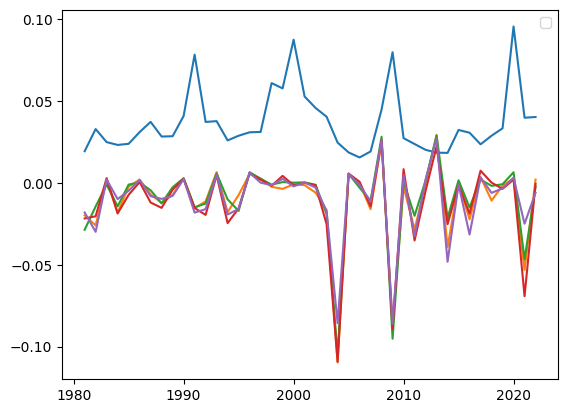

In [8]:
list_ = ['OLS_MSE','NN1_OOS', 'NN2_OOS','NN3_OOS', 'NN4_OOS']
list_ = ['OLS_MSE','NN1_OOS', 'NN2_OOS','NN3_OOS', 'NN4_OOS']
plt.plot(test_result[list_])
#plt.plot(test_result['NN2_MSE']
plt.legend()